In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
df = pd.read_csv("covtype.csv")
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
X = df.drop(columns=['Cover_Type']).values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
if np.isnan(X_scaled).any():
    imputer = SimpleImputer(strategy='mean')
    X_scaled_cleaned = imputer.fit_transform(X_scaled)
else:
    X_scaled_cleaned = X_scaled

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_cleaned)

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
labels = clusterer.fit_predict(X_pca)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


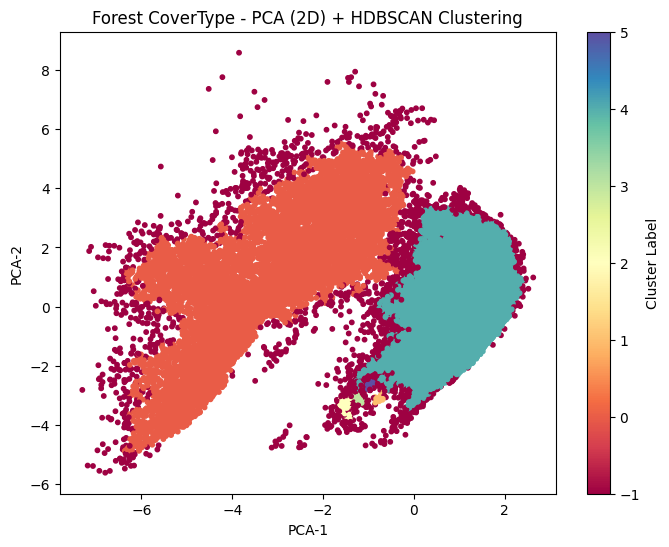

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Spectral', s=10)
plt.title("Forest CoverType - PCA (2D) + HDBSCAN Clustering")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.colorbar(label="Cluster Label")
plt.show()

/tmp/ipython-input-2467588495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_sizes, x="Cluster", y="Size", palette="viridis")


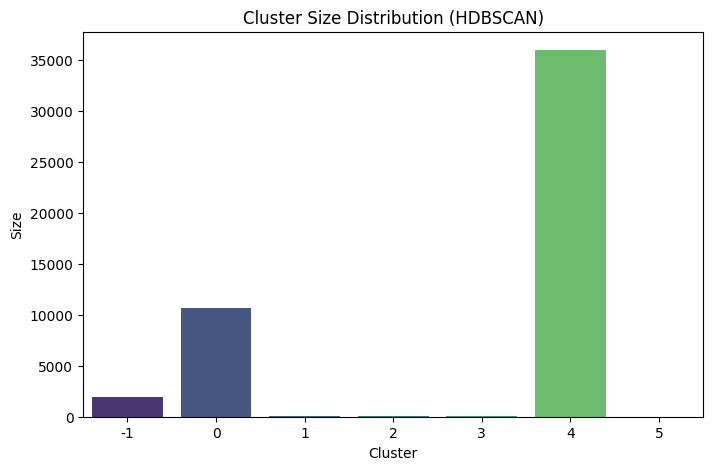

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = pd.DataFrame({"Cluster": unique, "Size": counts})

plt.figure(figsize=(8,5))
sns.barplot(data=cluster_sizes, x="Cluster", y="Size", palette="viridis")
plt.title("Cluster Size Distribution (HDBSCAN)")
plt.show()


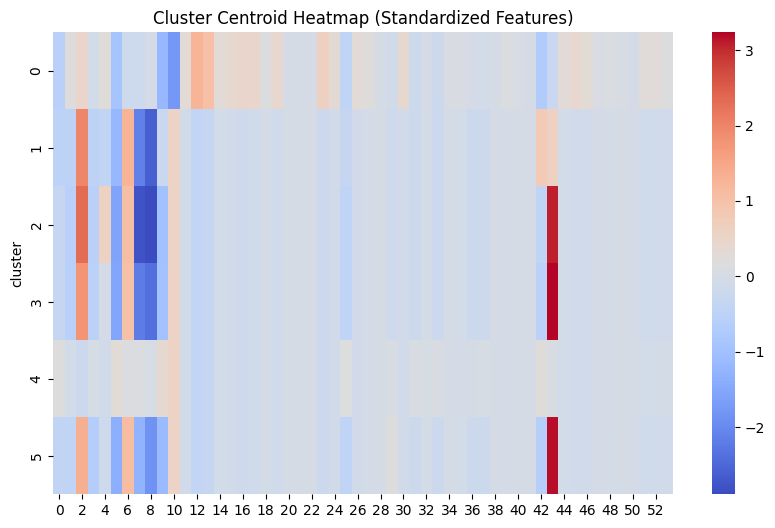

In [ ]:
valid_clusters = labels >= 0
df_valid = pd.DataFrame(X_scaled[valid_clusters])
df_valid["cluster"] = labels[valid_clusters]

centroids = df_valid.groupby("cluster").mean()

plt.figure(figsize=(10,6))
sns.heatmap(centroids, cmap="coolwarm")
plt.title("Cluster Centroid Heatmap (Standardized Features)")
plt.show()

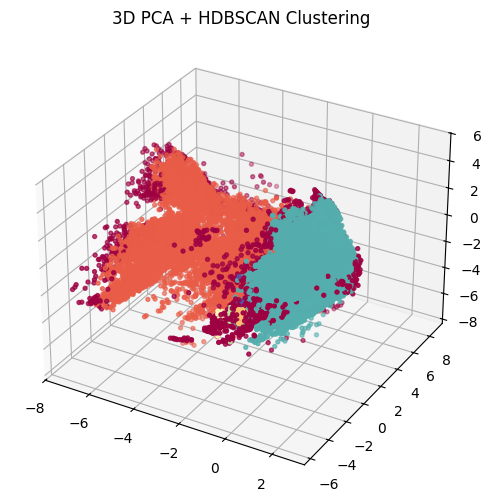

In [ ]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled_cleaned)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=labels, cmap='Spectral', s=8)
ax.set_title("3D PCA + HDBSCAN Clustering")
plt.show()

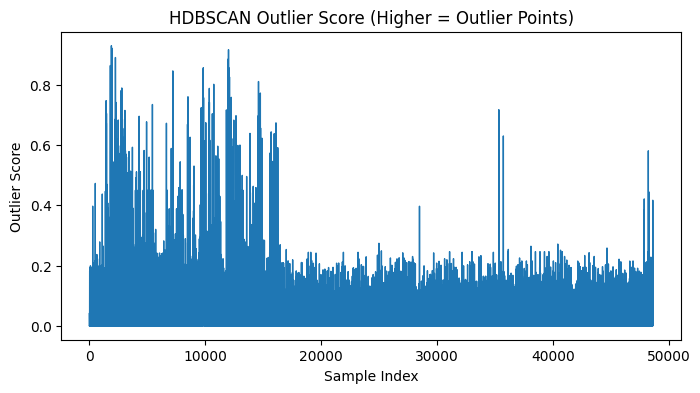

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(clusterer.outlier_scores_, linewidth=1)
plt.title("HDBSCAN Outlier Score (Higher = Outlier Points)")
plt.xlabel("Sample Index")
plt.ylabel("Outlier Score")
plt.show()